<a href="https://colab.research.google.com/github/vivek12367/Airbnb/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
contacts_file = ("contacts.tsv")
contacts = pd.read_csv(contacts_file, sep="\t")

searches_file = ("searches.tsv")
searches = pd.read_csv(searches_file, sep="\t")

In [4]:
print('Contacts')
print(contacts.isnull().sum()/len(contacts),'\n')
print('Searches')
print(searches.isnull().sum()/len(searches),'\n')

Contacts
id_guest          0.000000
id_host           0.000000
id_listing        0.000000
ts_contact_at     0.000000
ts_reply_at       0.077208
ts_accepted_at    0.536367
ts_booking_at     0.722101
ds_checkin        0.000000
ds_checkout       0.000000
n_guests          0.000000
n_messages        0.000000
dtype: float64 

Searches
ds                      0.000000
id_user                 0.000000
ds_checkin              0.331561
ds_checkout             0.331561
n_searches              0.000000
n_nights                0.331561
n_guests_min            0.000000
n_guests_max            0.000000
origin_country          0.000000
filter_price_min        0.627221
filter_price_max        0.627221
filter_room_types       0.546940
filter_neighborhoods    0.962336
dtype: float64 



In [6]:
contacts.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50.0,2014-10-10 15:07:01.0,NaN,NaN,2014-10-17,2014-10-19,2,3
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53.0,NaN,NaN,NaN,2014-10-17,2014-10-19,2,2
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26.0,2014-10-10 15:24:26.0,2014-10-10 15:24:26.0,2014-10-10 15:52:42.0,2014-10-17,2014-10-19,2,14


In [7]:
searches.head()

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,..."
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt"
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN


The neighborhood column in searches has 96.2336% of null values. This could lead to inaccurate assumptions about the demand from people. When looking through the column, 'City Centre' was a common choice, so this should be investigated further with more data

# Exploring Searches Dataset

In [5]:
searches = searches.drop(columns=['filter_neighborhoods'])

In [8]:
searches['ds']=pd.to_datetime(searches['ds'])
searches['ds_checkin']=pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout']=pd.to_datetime(searches['ds_checkout'])


In [9]:
#How soon they want the room
searches['length_preperation'] = searches['ds_checkin'] - searches['ds']

In [10]:
display(searches.describe())

,ds,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max,length_preperation
count,35737,23888,23888,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04,23888
mean,2014-10-07 14:32:34.478551552,2014-11-27 22:42:10.609511168,2014-12-05 14:50:57.468184832,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07,51 days 08:11:53.730743469
min,2014-10-01 00:00:00,2014-10-01 00:00:00,2014-10-02 00:00:00,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00,-1 days +00:00:00
25%,2014-10-04 00:00:00,2014-10-17 00:00:00,2014-10-23 00:00:00,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01,10 days 00:00:00
50%,2014-10-08 00:00:00,2014-11-03 00:00:00,2014-11-09 00:00:00,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02,26 days 00:00:00
75%,2014-10-11 00:00:00,2014-12-13 00:00:00,2014-12-24 00:00:00,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02,67 days 00:00:00
max,2014-10-14 00:00:00,2016-06-02 00:00:00,2016-08-17 00:00:00,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09,604 days 00:00:00
std,NaN,NaN,NaN,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08,65 days 18:56:19.491940518


This shows that the number of guests is usually 1 or 2. This can be understood since even at 75% the n_guests_min and n_guests_max are 2 and at 25% is 1. Leads to believe that smaller accommodations are preferred.

In [11]:
display(searches.skew(axis = 0, numeric_only = True, skipna = True))

,0
n_searches,7.509258
n_nights,9.942364
n_guests_min,3.583798
n_guests_max,3.148548
filter_price_min,11.087745
filter_price_max,2.999833


All numeric columns have a Fisher-Pearson coefficient value greater than 1. This results in a positive skewness.

In [12]:
import numpy as np

# List of columns to transform
cols_to_transform = [
    'n_searches',
    'n_nights',
    'n_guests_min',
    'n_guests_max',
    'filter_price_min',
    'filter_price_max'
]

# Apply log1p (log(1 + x)) to handle zero values safely
searches_log_transformed = searches.copy()
searches_log_transformed[cols_to_transform] = np.log1p(searches[cols_to_transform])

In [13]:
display(searches_log_transformed[cols_to_transform].skew())

,0
n_searches,0.791423
n_nights,1.795311
n_guests_min,1.751904
n_guests_max,1.350444
filter_price_min,4.033222
filter_price_max,2.842100


Now, We can see there is an significanr drop in pearson coefficient

Text(0, 0.5, 'Frequency')

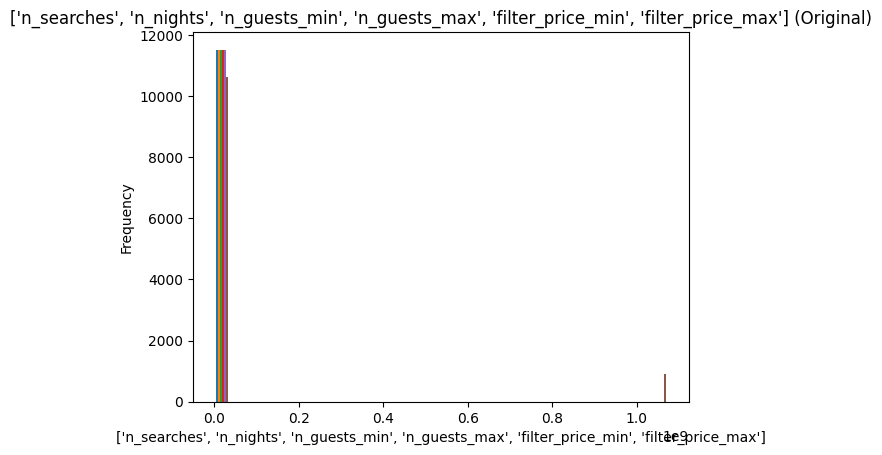

In [23]:
plt.hist(searches[cols_to_transform].dropna(), bins=30)
plt.title(f'{cols_to_transform} (Original)')
plt.xlabel(cols_to_transform)
plt.ylabel('Frequency')


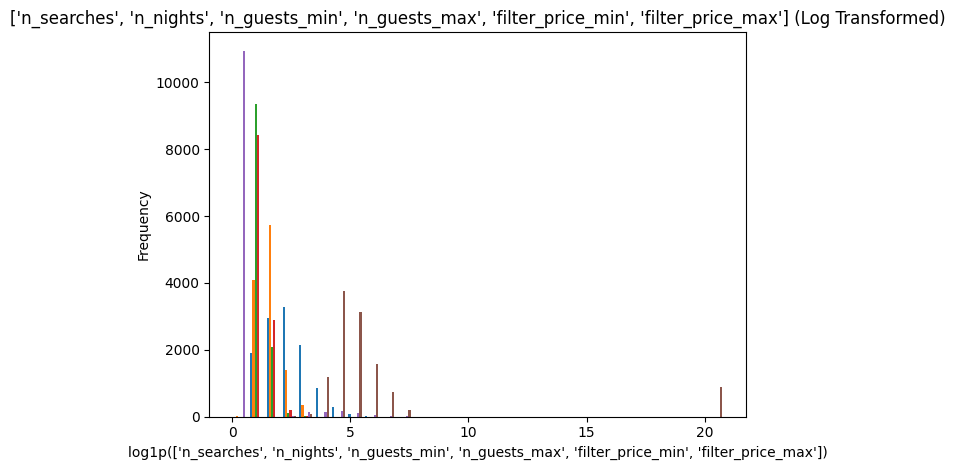

In [21]:
import matplotlib.pyplot as plt
plt.hist(searches_log_transformed[cols_to_transform].dropna(), bins=30)
plt.title(f'{cols_to_transform} (Log Transformed)')
plt.xlabel(f'log1p({cols_to_transform})')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Distributions

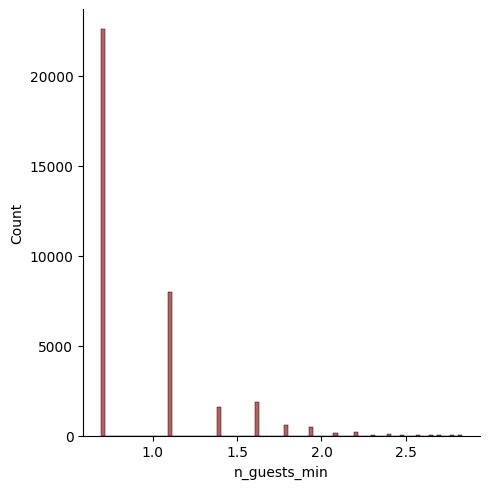

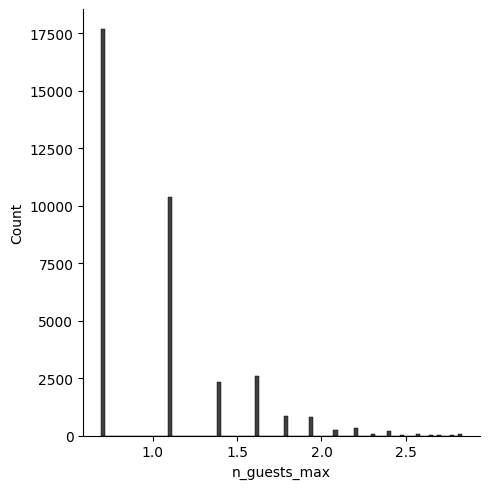

In [14]:
#Distribution plot of n_guests_min and n_guests_max
sns.displot(searches_log_transformed, x = 'n_guests_min', color = 'brown')
sns.displot(searches_log_transformed, x = 'n_guests_max', color = 'black')
plt.show()

Both have similar distributions with 1 being the most popular option and 1.25 being the next popular option



[[None, None, None, None, None, None, None]]

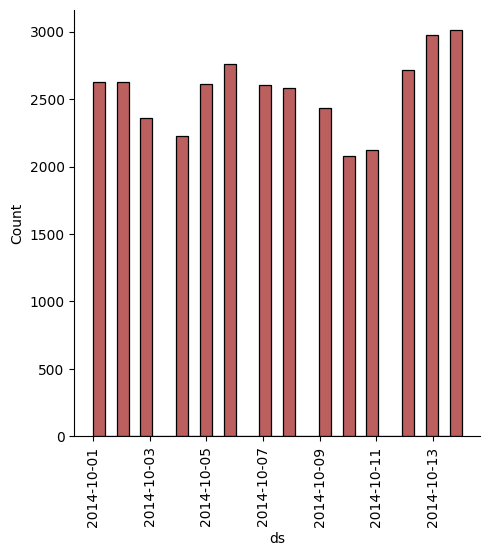

In [15]:
#When were searches conducted

ax = sns.displot(searches_log_transformed, x = 'ds', color = 'brown')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in ax.axes.flat]

Noticed all date searches were between October 1st to October 14th. No major variation in when search was conducted between these dates

In [17]:
searches_log_transformed.head()

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,length_preperation
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,2.833213,1.386294,1.098612,1.098612,IE,0.0,4.219508,",Entire home/apt,Entire home/apt,Private room,...",8 days
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,1.386294,2.397895,0.693147,1.098612,IE,0.0,4.219508,NaN,8 days
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaT,NaT,0.693147,NaN,0.693147,0.693147,GB,NaN,NaN,NaN,NaT
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,2.484907,1.098612,0.693147,1.098612,GB,NaN,NaN,",Entire home/apt",38 days
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaT,NaT,0.693147,NaN,0.693147,0.693147,IE,NaN,NaN,NaN,NaT


In [19]:
print(len(searches_log_transformed[searches_log_transformed['filter_price_max'] > 100])/len(searches['filter_price_max'])*100, '%')


0.0 %


9.396423874415872 % 



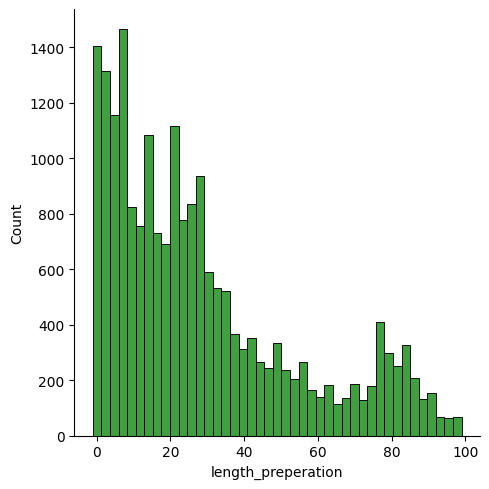

In [24]:
#Distribution of length_preperation of searches

#Percentage of dataset beyond 100 days
distribution = searches_log_transformed["length_preperation"] / np.timedelta64(1, 'D')
print(len(distribution[distribution > 100])/len(distribution)*100, '% \n')

#Remove values beyond 100 days
distribution = distribution[distribution < 100]

#Distribution plot of length_preperation column
sns.displot(x=distribution, color = 'green')
plt.show()

100 days was chosen as the limit since only 14.06% of the dataset exists beyond that



0.0027982203318689313 % 



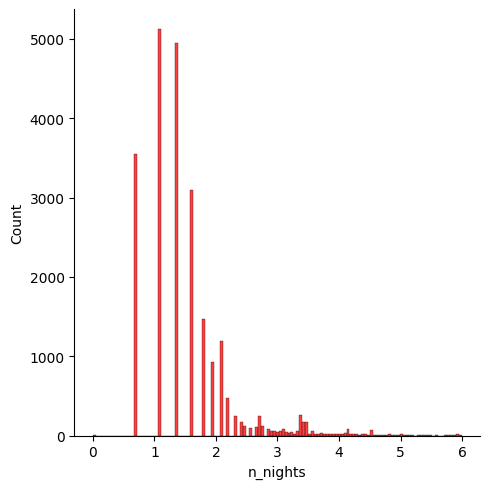

In [25]:
#Distribution of n_nights of searches

#Percentage of dataset beyond 20 nights
print(len([searches_log_transformed['n_nights'] > 20])/len(searches_log_transformed['n_nights'])*100, '% \n')

#Remove n_nights beyond 20 days
searches_within_twenty = searches_log_transformed[searches_log_transformed['n_nights'] < 20]

#Distribution plot of length_preperation column
sns.displot(searches_within_twenty, x='n_nights', color = 'red')
plt.show()

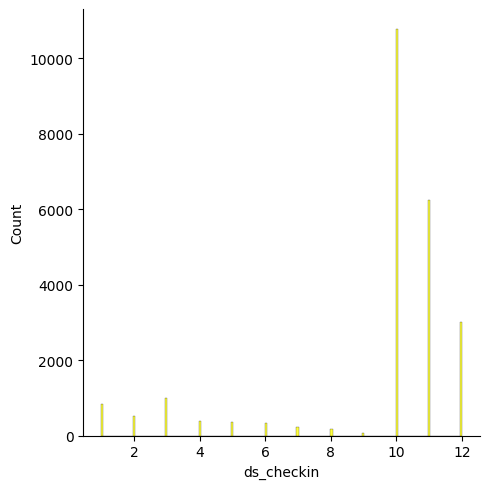

In [26]:
#Distribution of months of ds_checkin of searches

checkin_month = pd.DatetimeIndex(searches_log_transformed['ds_checkin']).month

#Distribution plot of length_preperation column
sns.displot(checkin_month, color = 'yellow')
plt.show()

Used only the check-in month, cause checkout is usually within 5/6 days. The mean of n_nights after removing the upper outlier limit is 5.6, so assumed 5 or 6 days after the check-in date people usually checkout

In [27]:
searches_log_transformed['filter_room_types'].unique()[0:15] #Display first 15 unique values

array([',Entire home/apt,Entire home/apt,Private room,Private room', nan,
       ',Entire home/apt',
       'Entire home/apt,Entire home/apt,Private room,Private room',
       'Entire home/apt', ',Shared room,Private room',
       'Entire home/apt,Private room,Shared room,Private room,Shared room',
       'Private room', 'Entire home/apt,Private room', ',Private room',
       ',Entire home/apt,Private room',
       ',Entire home/apt,Private room,Private room',
       'Entire home/apt,Private room,Shared room',
       ',Entire home/apt,Entire home/apt,Private room',
       ',Entire home/apt,Entire home/apt,Shared room,Shared room'],
      dtype=object)

In [28]:
#Find top 15 countries where searches originate from

#Group by origin country and finding the count of each country
search_origin = searches_log_transformed.groupby("origin_country").agg({'origin_country' : 'count'})
search_origin.columns = ['count']

search_origin = search_origin.sort_values('count', ascending = False) #Sort count in descending order
search_origin.nlargest(15, 'count') #Find the 15 largest values

,count
origin_country,
IE,6608
US,5811
GB,4832
FR,3444
IT,2333
DE,2170
ES,1759
CA,1085
AU,962


#Contacts Dataset

In [29]:
#Manipulation of contacts dataset

#Convert date columns to datetime data type
contacts['ts_contact_at'] = pd.to_datetime(contacts['ts_contact_at'])
contacts['ts_reply_at'] = pd.to_datetime(contacts['ts_reply_at'])
contacts['ts_accepted_at'] = pd.to_datetime(contacts['ts_accepted_at'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
contacts['ds_checkin'] = pd.to_datetime(contacts['ds_checkin'])
contacts['ds_checkout'] = pd.to_datetime(contacts['ds_checkout'])
contacts['accepted'] = np.where(np.isnan(contacts['ts_accepted_at']), False, True)

contacts['length_stay'] = contacts['ds_checkout'] - contacts['ds_checkin']

#Understand dataset
display(contacts.dtypes)
display(contacts.describe())

,0
id_guest,object
id_host,object
id_listing,object
ts_contact_at,datetime64[ns]
ts_reply_at,datetime64[ns]
ts_accepted_at,datetime64[ns]
ts_booking_at,datetime64[ns]
ds_checkin,datetime64[ns]
ds_checkout,datetime64[ns]
n_guests,int64


,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages,length_stay
count,7823,7219,3627,2174,7823,7823,7823.000000,7823.000000,7823
mean,2014-10-10 11:59:33.640802816,2014-10-10 22:42:36.511982336,2014-10-11 14:07:07.993382912,2014-10-13 07:54:43.307267840,2014-11-16 09:47:00.452511744,2014-11-22 05:12:33.317141760,2.422600,6.319954,5 days 19:25:32.864629937
min,2014-03-04 11:08:13,2014-04-18 09:39:06,2014-05-21 16:51:54,2014-05-21 16:51:54,2014-10-01 00:00:00,2014-10-02 00:00:00,1.000000,1.000000,1 days 00:00:00
25%,2014-10-03 16:28:52,2014-10-03 23:07:32,2014-10-04 13:45:13,2014-10-05 13:53:46,2014-10-15 00:00:00,2014-10-19 00:00:00,1.000000,2.000000,2 days 00:00:00
50%,2014-10-08 17:34:36,2014-10-09 00:16:21,2014-10-09 13:46:50,2014-10-10 11:15:13,2014-10-31 00:00:00,2014-11-06 00:00:00,2.000000,4.000000,3 days 00:00:00
75%,2014-10-13 21:28:51.500000,2014-10-14 10:00:04.500000,2014-10-14 16:28:27.500000,2014-10-15 13:16:17.249999872,2014-11-22 00:00:00,2014-11-30 00:00:00,3.000000,8.000000,5 days 00:00:00
max,2015-02-02 08:45:18,2015-02-02 23:18:25,2015-02-03 14:16:42,2015-01-21 16:16:29,2015-10-24 00:00:00,2015-12-01 00:00:00,16.000000,102.000000,334 days 00:00:00
std,NaN,NaN,NaN,NaN,NaN,NaN,1.617347,6.472827,14 days 23:45:24.447710564


In [30]:
display(contacts.skew(axis = 0, numeric_only = True, skipna = True))

,0
n_guests,2.441468
n_messages,3.696440
accepted,0.145883


In [32]:
# Columns to transform
cols_to_trans = [
    'n_guests',
    'n_messages',
    'accepted',
]

contacts_log_transformed = contacts.copy()
contacts_log_transformed[cols_to_trans] = np.log1p(contacts[cols_to_trans])

In [35]:
from scipy.stats import boxcox
import pandas as pd

# Columns to apply Box-Cox transformation
cols_to_transform = ['n_guests', 'n_messages']

# Make a copy of the DataFrame
contacts_boxcox = contacts.copy()

# Store lambda values (optional, for inverse transform later)
lambdas = {}

# Apply Box-Cox to each column
for col in cols_to_transform:
    # Add small constant if needed to avoid zeros
    if (contacts[col] <= 0).any():
        contacts_boxcox[col] = contacts[col] + 1

    transformed, fitted_lambda = boxcox(contacts_boxcox[col])
    contacts_boxcox[col] = transformed
    lambdas[col] = fitted_lambda

# Show new skewness
display(contacts_boxcox[cols_to_transform].skew())


,0
n_guests,0.042022
n_messages,0.026949


I have used Box-Cox to reduce the skewness

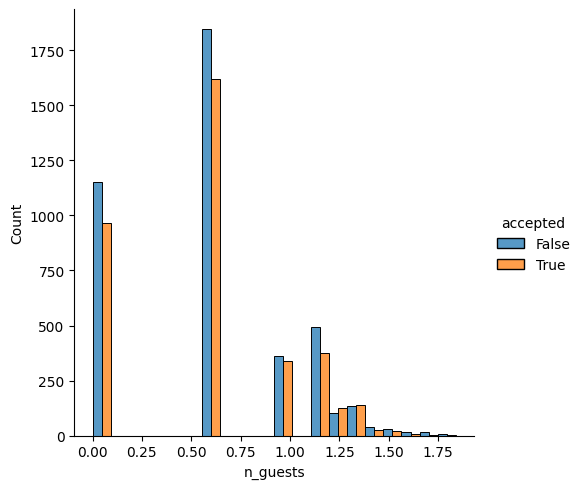

In [36]:
#Number of guests stayed

contacts_less8 = contacts_boxcox[contacts_boxcox['n_guests'] < 8]
sns.displot(contacts_less8, x = 'n_guests', hue = 'accepted', multiple="dodge")
plt.show()

In [37]:
#Conversion rate from accepting to booking

contacts_boxcox['ts_booking_at'].count()/contacts_boxcox['ts_accepted_at'].count()

np.float64(0.5993934381031155)

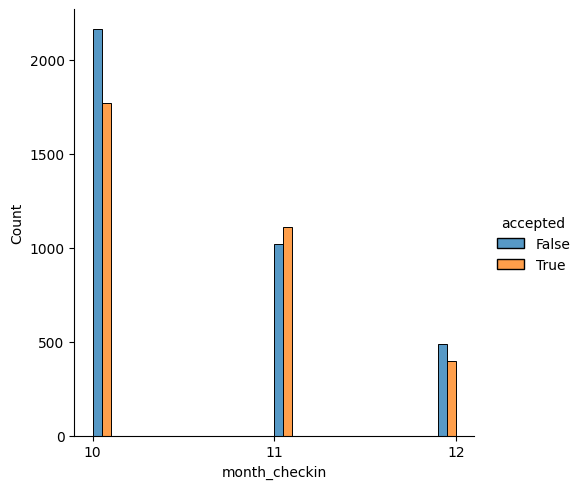

In [38]:
#Timeframe of when guests or accepted vs rejected

contacts_boxcox['month_checkin'] = contacts_boxcox['ds_checkin'].dt.month #Extract month from checkin date
contacts_checkin = contacts_boxcox[contacts_boxcox['month_checkin'] > 9] #Use only peak season months (Oct, Nov, Dec)

#Distribution of checkin among October, November, and December and split by acceptance
sns.displot(contacts_checkin, x='month_checkin', hue = 'accepted', multiple="dodge")
plt.xticks([10, 11, 12])
plt.show()

In [39]:
merged_datasets = contacts_boxcox.merge(searches_log_transformed, left_on='id_guest', right_on='id_user')


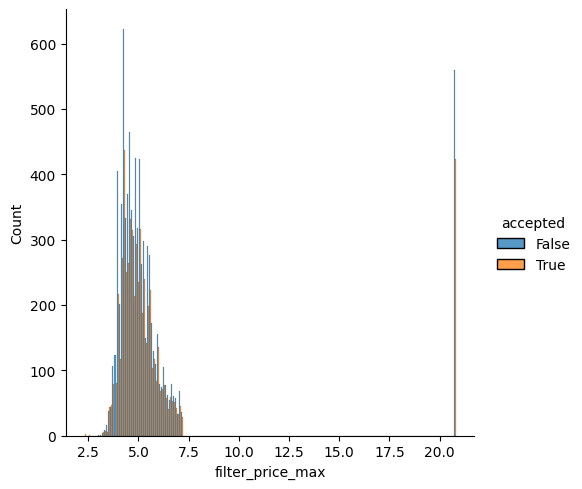

In [40]:
#Check difference between prices searched between accepted/rejected applicants

merged_pricemax_filter = merged_datasets.loc[(merged_datasets['filter_price_max'] <= 600)]

sns.displot(merged_pricemax_filter, x="filter_price_max", hue="accepted", multiple="dodge")
plt.show()

In [41]:
#Classify dataset based on filter_price_max

def label_price (row):
    if (row['filter_price_max'] >= 0) & (row['filter_price_max'] < 100):
        return '0-100'

    elif (row['filter_price_max'] >= 100) & (row['filter_price_max'] < 200):
        return '100-200'

    elif (row['filter_price_max'] >= 200) & (row['filter_price_max'] < 300):
        return '200-300'

    elif (row['filter_price_max'] >= 300) & (row['filter_price_max'] < 400):
        return '300-400'

    elif (row['filter_price_max'] >= 400) & (row['filter_price_max'] < 500):
        return '400-500'

    elif (row['filter_price_max'] >= 500) & (row['filter_price_max'] < 600):
        return '500-600'

    else:
        return '600+'

merged_datasets['classification_max_price'] = merged_datasets.apply(lambda row: label_price(row), axis=1)

merged_datasets.groupby('classification_max_price').agg({'accepted': 'mean'})

,accepted
classification_max_price,
0-100,0.426061
600+,0.432920


In [42]:
#Find the acceptance rate by country

dataset_country = merged_datasets[['origin_country', 'accepted']]

#Find acceptance count by country and accepted
accepted_count = dataset_country.groupby(['origin_country', 'accepted']).agg({'origin_country':'count'})
accepted_count.columns = ['count_accepted']

#Find acceptance count by country
country_count = dataset_country.groupby(['origin_country']).agg({'origin_country':'count'})
country_count.columns = ['count_country']

#Merge datasets for easier manipulation
acceptance_country = pd.merge(dataset_country, accepted_count,  how='left', on=['origin_country','accepted']) #Merge accepted count
acceptance_country = acceptance_country.drop_duplicates()

acceptance_country = pd.merge(acceptance_country, country_count, how='left', on=['origin_country']) #Merge total country count
acceptance_country = acceptance_country.sort_values(['count_country', 'accepted'], ascending = [False, True])
acceptance_country = acceptance_country[acceptance_country['count_country'] >= 100] #100 is used so there is a good amount of data to make assumptions
acceptance_country = acceptance_country[acceptance_country['accepted'] == True]

#Divide count_accepted column by count_country column to find acceptance rate by country
acceptance_country['acceptance_rate'] = acceptance_country['count_accepted']/acceptance_country['count_country']
acceptance_country.sort_values(['acceptance_rate'], ascending = True)

,origin_country,accepted,count_accepted,count_country,acceptance_rate
73,IN,True,138,874,0.157895
55,HR,True,159,530,0.300000
54,RU,True,83,239,0.347280
72,AT,True,83,239,0.347280
11,IT,True,1183,3137,0.377112
100,AE,True,59,154,0.383117
0,CA,True,407,993,0.409869
13,IE,True,1217,2951,0.412403
24,ES,True,794,1914,0.414838
49,RO,True,50,118,0.423729
